## **Spam Ham Classification Project**
The Spam Ham Classification Project applies natural language processing and the Multinomial Naive Bayes algorithm to classify SMS messages as spam or ham. By preprocessing the text data and converting it into a numerical format, the model can accurately distinguish between spam and legitimate messages. The confusion matrix visualization provides insights into the model's performance and helps in understanding misclassifications.

# Solution Approach

### Model Explanation

The Spam Ham Classification model uses Natural Language Processing (NLP) techniques and the Multinomial Naive Bayes algorithm to classify SMS messages as either spam or ham (legitimate).

#### Steps Involved:

1. **Data Preprocessing:**
   - **Tokenization:** The text data (SMS messages) is first tokenized into individual words or tokens.
   - **Lowercasing:** All tokens are converted to lowercase to ensure uniformity and to prevent the model from treating words like "Hello" and "hello" differently.
   - **Stop Words Removal:** Common stop words (like "the", "is", etc.) that do not contribute much to the classification task are removed.
   - **Alphabetic Words:** Only alphabetic words are retained for analysis, discarding any numerical values or special characters.

2. **Creating a Feature Matrix:**
   - The `CountVectorizer` from scikit-learn is used to convert the preprocessed text data into a numerical feature matrix (`x`). Each row of this matrix represents a message, and each column represents a unique word present in the corpus of messages.
   - The values in this matrix represent the count of each word (term frequency) in each message.

3. **Train-Test Split:**
   - The dataset is split into training (`x_train`, `y_train`) and testing (`x_test`, `y_test`) sets using `train_test_split`. This separation ensures that the model's performance can be evaluated on unseen data.

4. **Model Training:**
   - The Multinomial Naive Bayes (MNB) classifier is chosen for its effectiveness in text classification tasks like spam detection. This algorithm assumes that the presence of a particular word in a message is independent of the presence of other words (naive assumption) and calculates the probability of a message being spam or ham based on the frequencies of words.

5. **Prediction and Evaluation:**
   - The model is trained using the training data (`x_train`, `y_train`) via `model.fit`.
   - Predictions are made on the test set (`x_test`) using `model.predict`.
   - The accuracy of the model is calculated using `accuracy_score(y_test, predictions)`, which measures how well the model predicts the correct labels compared to the actual labels (`y_test`).
   - A confusion matrix (`confusion_matrix(y_test, predictions)`) is created to visualize the model's performance, showing the number of true positives, true negatives, false positives, and false negatives.

6. **Testing with User Input:**
   - After training and evaluating the model, you can test it with new, unseen messages by preprocessing the user's input similarly to the training data.
   - The preprocessed user message is vectorized using the same `CountVectorizer` to transform it into a format understandable by the model.
   - Finally, the model predicts whether the user input is spam or ham, providing immediate feedback.


In [2]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

### **Loading Data:**
The dataset containing SMS messages labeled as spam or ham is loaded into a DataFrame using `pd.read_csv`.

In [3]:
df=pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['labels', 'message'])
df.head()

,labels,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### **Data Preprocessing:**
The text data is preprocessed to lowercase all words, tokenize the text, remove stop words (common words like "the," "is," etc.), and keep only alphabetic words using NLTK.

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/ramachandra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ramachandra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stop_words=set(stopwords.words('english'))
#stop_words

In [6]:
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in nltk.word_tokenize(x.lower())
                                                       if term not in stop_words and term.isalpha()))

### **Creating Feature Matrix:**
The CountVectorizer from scikit-learn is used to convert the text data into a numeric feature matrix, representing the occurrence of words in each message.

In [7]:
count_vectorizer=CountVectorizer()
x=count_vectorizer.fit_transform(df['message'])
y=df['labels']

### **Train-Test Split:**
The data is split into training and testing sets using `train_test_split`.

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

### **Model Training:**
The Multinomial Naive Bayes classifier is chosen for text classification. The model is trained on the training data using `model.fit`.

In [9]:
model=MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

### **Prediction and Evaluation:**
The model's predictions are obtained for the test set using model.predict. The accuracy of the model is calculated using accuracy_score, and the confusion matrix is created and visualized using `confusion_matrix`, `matplotlib`, and `seaborn`.

In [10]:
predictions=model.predict(x_test)
print('Accuracy: ',accuracy_score(y_test, predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions))

Accuracy:  0.9688809096349491
Confusion Matrix: 
 [[1429   34]
 [  18  190]]


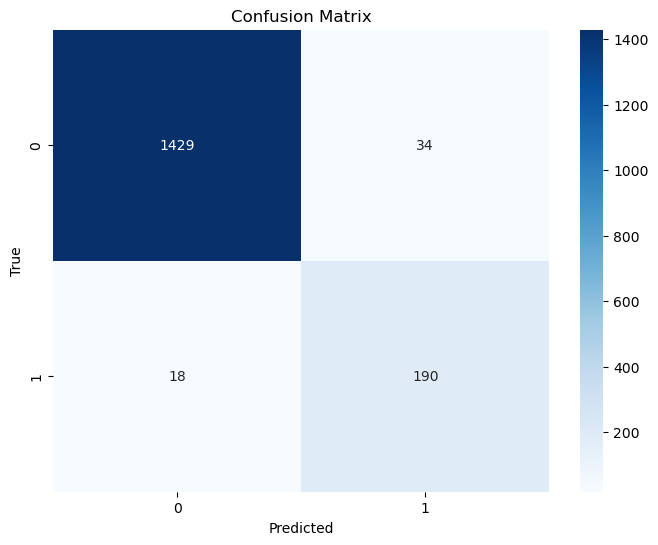

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### TEsting with user inputs

In [12]:
# Function to test user input
def test_user_input(input_message):
    # Preprocess user input
    processed_input = ' '.join(term for term in nltk.word_tokenize(input_message.lower())
                               if term not in stop_words and term.isalpha())
    
    # Vectorize user input
    input_vector = count_vectorizer.transform([processed_input])
    
    # Predict using the model
    prediction = model.predict(input_vector)
    
    # Print predicted result
    print(f"Input message: {input_message}")
    print(f"Predicted label: {prediction[0]}")

# Test with user input
test_user_input("Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.")
test_user_input("Hey, are we still meeting for lunch today?")


Input message: Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.
Predicted label: spam
Input message: Hey, are we still meeting for lunch today?
Predicted label: ham


### Conclusion

The Spam Ham Classification model effectively uses NLP techniques and the Multinomial Naive Bayes algorithm to classify SMS messages based on their content. It preprocesses text data, converts it into a numerical format, trains a model to learn from this data, and then predicts the nature of new messages. This approach ensures efficient and accurate identification of spam messages, thereby enhancing user experience and security.